In [10]:
print("Renseigner le chemin du fichier spectrum.fits")

Renseigner le chemin du fichier spectrum.fits


In [11]:
from astropy.io import fits
data = fits.open('/Users/davidsanchez/work/Studen/TP_CTA_2020/TPAstro/git_tp/David/spectrum.fits')

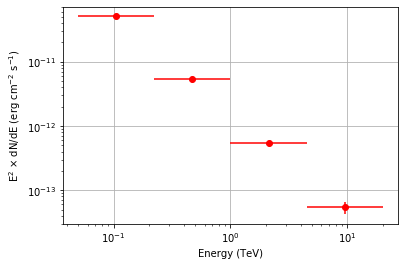

In [23]:
#! /usr/bin/env python

import matplotlib.pyplot as plt



emin=[]
emax=[]
emoy=[]
flux=[]
errflux=[]
intflux = []

for i in range(0,len(data[1].data)):
    emin.append(data[1].data[i][1])
    emax.append(data[1].data[i][2])
    emoy.append(data[1].data[i][0])
    flux.append(data[1].data[i][3])
    errflux.append(data[1].data[i][4])

    
    dnde = flux[i]/1.602/emoy[i]**2
    intflux.append((emax[i]**-1.5-emin[i]**-1.5)/(-1.5)*dnde/(emoy[i]**-2.5))
    errintflux = intflux[i]*errflux[i]/flux[i]

plt.figure()
plt.loglog()
plt.grid()
plt.errorbar(emoy, intflux, yerr=errintflux, xerr=[emin, emax], fmt='ro')
plt.xlabel('Energy (TeV)')
plt.ylabel(r'E$^2$ $\times$ dN/dE (erg cm$^{-2}$ s$^{-1}$)')

# Show figure
plt.show()

In [21]:
print("Energie (TeV)  Flux +/- dFlux (photon/cm*2/s)")
for i in range(len(flux)):
    print(emoy[i],intflux[i],errintflux[i])

Energie (TeV)  Flux +/- dFlux (ergs/cm*2/s)
0.10573712634405638 5.0744367016776106e-11 5.079998853516575e-13
0.47287080450158786 5.480283005105938e-12 2.2976132811396264e-13
2.1147425268811286 5.50957433835557e-13 1.5423039644500875e-13
9.45741609003176 5.404253006753941e-14 1.49204633874558e-13
